# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Will-a-tropical-storm-make-landfall?-1" href="#Will-a-tropical-storm-make-landfall?"><span class="toc-item-num">1&nbsp;&nbsp;</span>Will a tropical storm make landfall?</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Generate-the-dataset-1.1" href="#Generate-the-dataset"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate the dataset</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Open-the-source-dataset-1.1.1" href="#Open-the-source-dataset"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Open the source dataset</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Extract,-transform-and--load-features-(ETL)-1.1.2" href="#Extract,-transform-and--load-features-(ETL)"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Extract, transform and  load features (ETL)</a></div><div class="lev3 toc-item"><a data-toc-modified-id="class-label-distribution-of-filtered-source-dataset-1.1.3" href="#class-label-distribution-of-filtered-source-dataset"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>class label distribution of filtered source dataset</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Generate-random-sampling-of-each-prediction-(class)-value-and-generate-ARFF-file-1.1.4" href="#Generate-random-sampling-of-each-prediction-(class)-value-and-generate-ARFF-file"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Generate random sampling of each prediction (class) value and generate ARFF file</a></div><div class="lev3 toc-item"><a data-toc-modified-id="class-label-distribution-of-randomly-sampled-datasets-of-each-class-value-1.1.5" href="#class-label-distribution-of-randomly-sampled-datasets-of-each-class-value"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>class label distribution of randomly sampled datasets of each class value</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Save-DataFrame-datasets-(all,-landfall-and-nolandfall)-as-tables-in-HDF5-1.1.6" href="#Save-DataFrame-datasets-(all,-landfall-and-nolandfall)-as-tables-in-HDF5"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Save DataFrame datasets (all, landfall and nolandfall) as tables in HDF5</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Visualize-the-dataset-storms-tracks-1.1.7" href="#Visualize-the-dataset-storms-tracks"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Visualize the dataset storms tracks</a></div>

* **FA16-BL-INFO-I526-34917**
* **Applied Machine Learning**
* **Gerald Manipon, MS Data Science student - Indiana University**
* **gmanipon@iu.edu**
* **this jupyter notebook can be found here: https://github.com/pymonger/tropicalstorm-ml-analysis**

# Will a tropical storm make landfall?

As a native of the Hawaiian Islands, the recent tropical storms (Madeline and Lester) that have threatened the state has sparked a very interesting and personal question. Can we predict wether or not a tropical storm will make landfall and possibly affect the safety and lives of the inhabitants? Currently there are real-time storm tracking models that enable our emergency response agencies to be as responsive as possible and to give up-to-the-minute status on potential threats. However, what does historical data say and can we predict landfall using machine learning on the initial observation of a tropical storm?

## Generate the dataset

The source dataset I will use comes the IBTrACS (International Best Track Archive for Climate Stewardship) project: https://www.ncdc.noaa.gov/ibtracs/index.php. This project is endorsed by the WMO (World Meteorological Organization) as an "official archiving and distribution resource for tropical cyclone best track data". The IBTrACS project provides datasets that:

* Contains the most complete global set of historical tropical cyclones available
* Combines information from numerous tropical cyclone datasets
* Simplifies inter-agency comparisons by providing storm data from multiple sources in one place
* Provides data in popular formats to facilitate analysis
* Checks the quality of storm inventories, positions, pressures, and wind speeds, passing the information on to the user

I will be using the IBTrACS-WMO NetCDF file that contains all storms: https://www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data. Since NetCDF is a self-describing format, info about the variables contained in this dataset can be instrospected. Additional info about the variables is located here: ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r08/wmo/netcdf/README.netcdf.

I will be performing some ETL (extraction, transformation and loading) tasks to prepare and filter (remove records with missing values) the source dataset to a derived dataset which I will use for the rest of the semester. The source dataset essentially aggregates every recorded tropical storm from different source agencies and provides time-series information of pertinent variables describing the storm as it progressed through its track. *Since I'm only interested in being able to predict whether or not the storm will make landfall based on the storm's genesis and initial observation, my derived dataset will be composed of features that are essentially the values of the source dataset variables at observation **t<sub>0</sub>**.*

The class variable (prediction variable) will be derived from the source dataset's **landfall** variable:

* **landfall** { True, False }
```
    short landfall(storm, time) ;
        landfall:long_name = "Minimum distance to land until next report (0=landfall)" ;
        landfall:units = "km" ;
        landfall:_FillValue = -999s ;
```

I will aggregate this variable into a single value of **True** or **False** if it makes landfall at anytime in a storm's track.

The features I will include from the source dataset are:

* **name** (STRING)
  ```
    char name(storm, ncharnm) ;
        name:long_name = "Storm name" ;
  ```
* **genesis_basin** { 0 = NA - North Atlantic, 1 = SA - South Atlantic, 2 = WP - West Pacific, 3 = EP - East Pacific, 4 = SP - South Pacific, 5 = NI - North Indian, 6 = SI - South Indian }
  ```
    byte genesis_basin(storm) ;
        genesis_basin:long_name = "Basin of genesis" ;
        genesis_basin:units = " " ;
        genesis_basin:key = "0 = NA - North Atlantic\n",
    "1 = SA - South Atlantic\n",
    "2 = WP - West Pacific\n",
    "3 = EP - East Pacific\n",
    "4 = SP - South Pacific\n",
    "5 = NI - North Indian\n",
    "6 = SI - South Indian\n",
    "7 = AS - Arabian Sea\n",
    "8 = BB - Bay of Bengal\n",
    "9 = EA - Eastern Australia\n",
    "10 = WA - Western Australia\n",
    "11 = CP - Central Pacific\n",
    "12 = CS - Carribbean Sea\n",
    "13 = GM - Gulf of Mexico\n",
    "14 = MM - Missing" ;
        genesis_basin:Note = "Based on where the storm began" ;
  ```
  * the additional variable info at ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r08/wmo/netcdf/README.netcdf states that only values 0-6 are used for this variable thus I will be discretizing the values for this feature
* **sub_basin** of first observation { 0 = NA - North Atlantic, 1 = SA - South Atlantic, 2 = WP - West Pacific, 3 = EP - East Pacific, 4 = SP - South Pacific, 5 = NI - North Indian, 6 = SI - South Indian, 7 = AS - Arabian Sea, 8 = BB - Bay of Bengal, 9 = EA - Eastern Australia, 10 = WA - Western Australia, 11 = CP - Central Pacific, 12 = CS - Carribbean Sea, 13 = GM - Gulf of Mexico, 14 = MM - Missing }
  ```
    byte sub_basin(storm, time) ;
        sub_basin:long_name = "Sub-Basin" ;
        sub_basin:units = " " ;
        sub_basin:key = "0 = NA - North Atlantic\n",
    "1 = SA - South Atlantic\n",
    "2 = WP - West Pacific\n",
    "3 = EP - East Pacific\n",
    "4 = SP - South Pacific\n",
    "5 = NI - North Indian\n",
    "6 = SI - South Indian\n",
    "7 = AS - Arabian Sea\n",
    "8 = BB - Bay of Bengal\n",
    "9 = EA - Eastern Australia\n",
    "10 = WA - Western Australia\n",
    "11 = CP - Central Pacific\n",
    "12 = CS - Carribbean Sea\n",
    "13 = GM - Gulf of Mexico\n",
    "14 = MM - Missing" ;
        sub_basin:Note = "Based on present location" ;
        sub_basin:_FillValue = '\201' ;
  ```
  * this feature will remain numeric since there are 14 values (2 more than the limit of 12 discrete variables imposed by the assignment)
* **time** of first observation (MJD value) (REAL)
  ```
    double time_wmo(storm, time) ;
        time_wmo:long_name = "Modified Julian Day" ;
        time_wmo:units = "days since 1858-11-17 00:00:00" ;
        time_wmo:_FillValue = 9.969209999999999e+36 ;
  ```
* **lon** (longitude) of first observation (REAL)
  ```
    short lon_wmo(storm, time) ;
        lon_wmo:long_name = "Storm center longitude" ;
        lon_wmo:units = "degrees_east" ;
        lon_wmo:scale_factor = 0.0099999998f ;
        lon_wmo:_FillValue = -32767s ;
  ```
* **lat** (latitude) of first observation (REAL)
  ```
    short lat_wmo(storm, time) ;
        lat_wmo:long_name = "Storm center latitude" ;
        lat_wmo:units = "degrees_north" ;
        lat_wmo:scale_factor = 0.0099999998f ;
        lat_wmo:_FillValue = -32767s ;
  ```
* **dist2land** (distance to land) of first observation (REAL)
  ```
    short dist2land(storm, time) ;
        dist2land:long_name = "Distance to land" ;
        dist2land:units = "km" ;
        dist2land:_FillValue = -999s ;
  ```
* **msw** (maximum sustained wind) of first observation (REAL)
  ```
    short pres_wmo(storm, time) ;
        pres_wmo:long_name = "Minimum Central Pressure (MCP)" ;
        pres_wmo:units = "mb" ;
        pres_wmo:scale_factor = 0.1f ;
        pres_wmo:_FillValue = -32767s ;
  ```
* **mcp** (minimum central pressure) of first observation (REAL)
  ```
    short wind_wmo(storm, time) ;
        wind_wmo:long_name = "Maximum Sustained Wind (MSW)" ;
        wind_wmo:units = "kt" ;
        wind_wmo:scale_factor = 0.1f ;
        wind_wmo:_FillValue = -32767s ;
  ```
* **nature** (storm nature) { 0 = TS - Tropical, 1 = SS - Subtropical, 2 = ET - Extratropical, 3 = DS - Disturbance, 4 = MX - Mix of conflicting reports, 5 = NR - Not Reported, 6 = MM - Missing, 7 = - Missing }
  ```
        nature_wmo:long_name = "Storm nature" ;
        nature_wmo:key = "0 = TS - Tropical\n",
    "1 = SS - Subtropical\n",
    "2 = ET - Extratropical\n",
    "3 = DS - Disturbance\n",
    "4 = MX - Mix of conflicting reports\n",
    "5 = NR - Not Reported\n",
    "6 = MM - Missing\n",
    "7 =  - Missing" ;
        nature_wmo:Note = "Based on classification from original sources" ;
        nature_wmo:_FillValue = '\201' ;
  ```
  * this feature will be discretized
* **track_type** { 0 = main - cylclogenesis to cyclolysis, 1 = merge - cyclogenesis to merger, 2 = split - split to cyclolysis, 3 = other - split to merger }
  ```
    byte track_type(storm) ;
        track_type:long_name = "Track type" ;
        track_type:key = "0 = main - cyclogenesis to cyclolysis\n",
    "1 = merge - cyclogenesis to merger\n",
    "2 = split - split to cyclolysis\n",
    "3 = other - split to merger" ;
  ```
  * this feature will be discretized


### Open the source dataset

In [1]:
import os, sys, re, json, arff
from subprocess import check_output
import netCDF4 as NC
import numpy as np
import pandas as pd
from ipyleaflet import Map, GeoJSON
from astropy.time import Time
from IPython.display import display, HTML, Markdown


# get netcdf dataset
file = "Allstorms.ibtracs_wmo.v03r08.nc"
ds = NC.Dataset(file)

### Extract, transform and  load features (ETL)

In [2]:
# define dict for discrete features
disc_map = {
    "basin": {
         0: "NA", # North Atlantic
         1: "SA", # South Atlantic
         2: "WP", # West Pacific
         3: "EP", # East Pacific
         4: "SP", # South Pacific
         5: "NI", # North Indian
         6: "SI", # South Indian
         7: "AS", # Arabian Sea
         8: "BB", # Bay of Bengal
         9: "EA", # Eastern Australia
        10: "WA", # Western Australia
        11: "CP", # Central Pacific
        12: "CS", # Carribbean Sea
        13: "GM", # Gulf of Mexico
        14: "MM", # Missing
    },
    "nature": {
        0: "TS",  # Tropical
        1: "SS",  # Subtropical
        2: "ET",  # Extratropical
        3: "DS",  # Disturbance
        4: "MX",  # Mix of conflicting reports
        5: "NR",  # Not Reported
        6: "MM",  # Missing
        7: "MM2", # Also Missing
    },
    "track_type": {
        0: "main",  # cyclogenesis to cyclolysis
        1: "merge", # cyclogenesis to merger
        2: "split", # split to cyclolysis
        3: "other", # split to merger
    }
}

# extract features from each hurricane and save into a list of dicts
data = []
landfall_count = 0

# compile regular expression for matching unnamed storms
unnamed_re = re.compile(r'(UNNAMED|NOT NAMED)')

for i in range(ds.dimensions['storm'].size):
    
    # get number of observations
    obs = ds.variables['numObs'][i]
    if obs <= 2: continue # skip if there are 2 or less observations
    
    # extract filterable features first
    name = np.array_str(NC.chartostring(ds.variables['name'][i,:]))[2:-1]
    genesis_basin = ds.variables['genesis_basin'][i]
    sub_basin = ds.variables['sub_basin'][i,:obs-1]
    nature = ds.variables['nature_wmo'][i:,obs-1]
    
    # skip records that have missing values in features
    if genesis_basin == 14:
        continue
    # skipping this filter; this filters out the east pacific storms
    #if sub_basin[0] == 14:
    #    continue
    if nature[0] in (4, 5, 6, 7):
        continue
        
    # skip records with unnamed storms
    if unnamed_re.search(name): continue
    
    # extract the rest of the features
    time = ds.variables['time_wmo'][i,:obs-1]
    time_iso = Time(time, format='mjd', scale='utc')
    
    # extract lon and handle wrapping issue
    lon = ds.variables['lon_wmo'][i,:obs-1]
    lon_diff = lon[0] - lon[-1]
    if lon_diff > 180.:
        lon[np.where(lon > 0)] -= 360.
    elif lon_diff < 180.:
        lon[np.where(lon < 0)] += 360.
        
    lat = ds.variables['lat_wmo'][i,:obs-1]
    dist2land = ds.variables['dist2land'][i,:obs-1]
    msw = ds.variables['wind_wmo'][i,:obs-1]
    mcp = ds.variables['pres_wmo'][i,:obs-1]
    tt = ds.variables['track_type'][i]
    landfall = (ds.variables['landfall'][i,:obs-1] == 0).any()
    
    # create GeoJSON of storm track
    ls = { 
        "type": "LineString",
        "coordinates": np.dstack((lon, lat))[0].tolist(),
    }
    
    # create feature for leaflet display;
    # stuff features into a message info for on_hover display
    msg = "{} {} {} {} {} {} {} {} {} {} {} {} {}".format(i, name, obs, genesis_basin, sub_basin[0],
                                                          time_iso[0].iso, lon[0], lat[0], dist2land[0],
                                                          msw[0], mcp[0], nature[0], tt, landfall)
    ls_feature = { 
        "type": "Feature",
        "properties": { "msg": msg },
        "geometry": ls,
    }
    
    # create data dict
    data.append({
        "name": name,
        "genesis_basin": disc_map['basin'][genesis_basin],
        "sub_basin": disc_map['basin'][sub_basin[0]],
        "time": time[0],
        "lon": lon[0],
        "lat": lat[0],
        "dist2land": dist2land[0],
        "msw": msw[0],
        "mcp": mcp[0],
        "nature": disc_map['nature'][nature[0]],
        "track_type": disc_map['track_type'][tt],
        "landfall": landfall,
        "feature": json.dumps(ls_feature),
    })
    
    # tally landfall
    if landfall: landfall_count += 1
    
# create data frame
df = pd.DataFrame(data)

# print class label distribution of filtered source dataset
display(Markdown("### class label distribution of filtered source dataset"))
display(Markdown("* total storms: {}".format(len(data))))
display(Markdown("* total storms with class variable landfall == True: {}".format(landfall_count)))
display(Markdown("* total storms with class variable landfall == False: {}".format(len(data)-landfall_count)))


### class label distribution of filtered source dataset

* total storms: 3636

* total storms with class variable landfall == True: 1655

* total storms with class variable landfall == False: 1981

In [3]:
display(df[['name', 'genesis_basin', 'sub_basin', 'time', 'lon', 'lat', 'dist2land', 'msw',
            'mcp', 'nature', 'track_type', 'landfall']])

,name,genesis_basin,sub_basin,time,lon,lat,dist2land,msw,mcp,nature,track_type,landfall
0,HIKI,EP,CP,33505.00,215.500000,14.500000,1229,25.0,0.0,TS,main,False
1,ABLE,NA,NA,33505.00,304.500000,17.100000,930,35.0,0.0,ET,main,True
2,BAKER,NA,NA,33511.50,306.000000,12.000000,683,30.0,0.0,TS,main,True
3,CHARLIE,NA,NA,33514.50,333.600006,11.099999,1045,35.0,0.0,ET,main,False
4,DOG,NA,NA,33523.75,304.399994,15.200000,772,80.0,0.0,ET,main,True
5,EASY,NA,CS,33525.25,276.799988,19.699999,194,40.0,0.0,TS,main,True
6,FOX,NA,NA,33532.25,319.000000,15.500000,1686,40.0,0.0,ET,main,False
7,GEORGE,NA,NA,33551.25,309.000000,24.600000,1660,35.0,0.0,ET,main,False
8,HOW,NA,GM,33555.25,271.600006,25.599998,385,30.0,0.0,TS,main,True
9,ITEM,NA,GM,33562.25,269.600006,23.299999,240,35.0,0.0,TS,main,True


### Generate random sampling of each prediction (class) value and generate ARFF file

In [4]:
# randomly sample 500 records of each class value
landfall_sample = df.loc[df['landfall'] == True].sample(500)
nolandfall_sample = df.loc[df['landfall'] == False].sample(500)

# generate ARFF file
arff_data = {
    "relation": "tropicalstorms",
    "description": "IBTrACS (International Best Track Archive for Climate Stewardship) tropical storm database",
    "attributes": [
        ("genesis_basin", ["NA", "SA", "WP", "EP", "SP", "NI", "SI"]),
        ("nature", ["TS", "SS", "ET", "DS"]),
        ("track_type", ["main", "merge", "split", "other"]),
        #("time", "DATE"),
        ("time", "REAL"),
        ("lon", "REAL"),
        ("lat", "REAL"),
        ("dist2land", "REAL"),
        ("msw", "REAL"),
        ("mcp", "REAL"),
        ("landfall", ["True", "False"]),
    ],
    "data": [],
}
for r in landfall_sample.itertuples():
    arff_data['data'].append([r.genesis_basin, r.nature, r.track_type,
                              #Time(r.time, format='mjd', scale='utc'),
                              r.time, r.lon, r.lat, r.dist2land, r.msw,
                              r.mcp, r.landfall]) 
for r in nolandfall_sample.itertuples():
    arff_data['data'].append([r.genesis_basin, r.nature, r.track_type,
                              #Time(r.time, format='mjd', scale='utc'),
                              r.time, r.lon, r.lat, r.dist2land, r.msw,
                              r.mcp,  r.landfall]) 
with open('tropicalstorms.arff', 'w') as f:
    arff.dump(arff_data, f)

# print class label distribution of randomly sampled datasets of each class value
display(Markdown("### class label distribution of randomly sampled datasets of each class value"))
display(Markdown("* total storms: {}".format(len(landfall_sample) + len(nolandfall_sample))))
display(Markdown("* total storms with class variable landfall == True: {}".format(len(landfall_sample))))
display(Markdown("* total storms with class variable landfall == False: {}".format(len(nolandfall_sample))))

### class label distribution of randomly sampled datasets of each class value

* total storms: 1000

* total storms with class variable landfall == True: 500

* total storms with class variable landfall == False: 500

### Save DataFrame datasets (all, landfall and nolandfall) as tables in HDF5

In [5]:
# save
df.to_hdf("tropicalstorms-all.h5", "tropicalstorms", format="table", complib="zlib", complevel=9)
landfall_sample.to_hdf("tropicalstorms-landfall.h5", "tropicalstorms", format="table", complib="zlib", complevel=9)
nolandfall_sample.to_hdf("tropicalstorms-nolandfall.h5", "tropicalstorms", format="table", complib="zlib", complevel=9)

### Visualize the dataset storms tracks

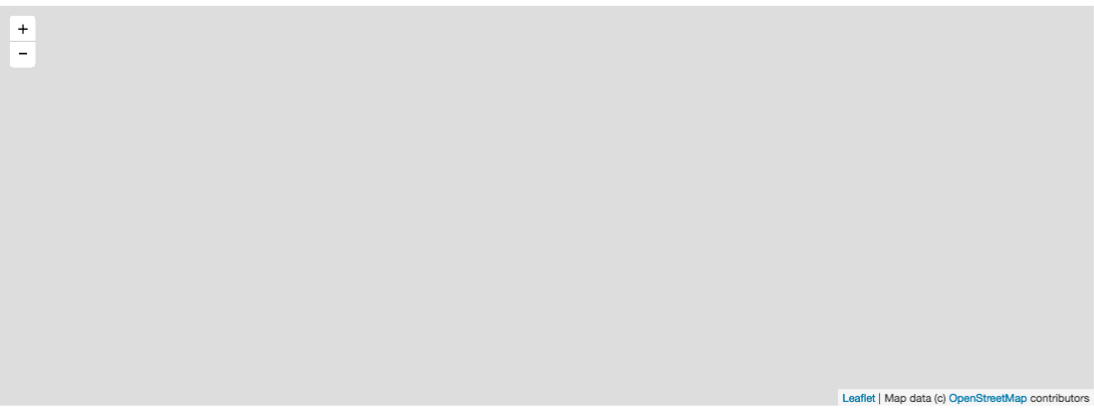

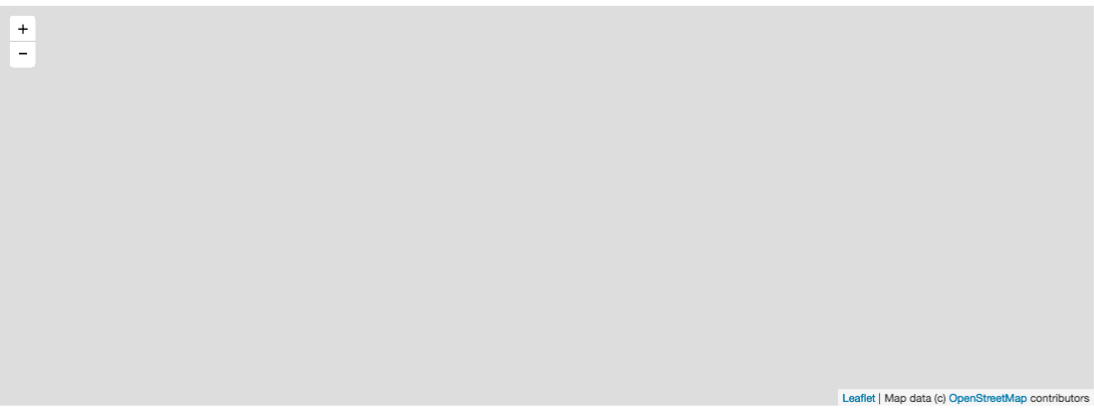

2498 08S:CHRISTINE 25 6 14 1964-01-09 06:00:00.000 35.0 -18.0 0 0.0 0.0 2 0

In [6]:
# set styles
landfall_style = {
    "color": "red",
    "weight": 1,
}
nolandfall_style = {
    "color": "green",
    "weight": 1,
}
hover_style = {
    "weight": 5,
}

# hover handler
def hover_handler(event=None, id=None, properties=None):
    sys.stdout.write("\r" + properties['msg'])
    sys.stdout.flush()

# show map    
m = Map(center=[0, 180], zoom=2)
m

In [7]:
# add tracks storms that made landfall
for r in landfall_sample.itertuples():
    l = GeoJSON(data=json.loads(r.feature), style=landfall_style, hover_style=hover_style)
    l.on_hover(hover_handler)
    m.add_layer(l)
    

In [8]:
# add tracks storms that didn't make landfall
for r in nolandfall_sample.itertuples():
    l = GeoJSON(data=json.loads(r.feature), style=nolandfall_style, hover_style=hover_style)
    l.on_hover(hover_handler)
    m.add_layer(l)
    